## Convolutions on Graphs

### Standard approach

### GCN
According to the paper [SEMI-SUPERVISED CLASSIFICATION WITH GRAPH CONVOLUTIONAL NETWORKS](https://arxiv.org/pdf/1609.02907.pdf), the layer-wise propagation rule for GCN is

$$
\begin{equation}
H^{(l+1)} = \sigma(\tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} H^{(l)} W^{(l)})
\end{equation}
$$

Here, $H^{(l)}$ is the input node feature vector and $H^{(l+1)}$ is the output. $H^{(0)} = X$\
$W^{(l)}$ is the trainable weight (linear projection layer). \
$\tilde{A} = A + I_N$ is the adjacency matrix with added self loop. \
$D$ is the degree matrix of $\tilde{A}$ and we can express it as $\tilde{D}_{ii} = \sum_{j} \tilde{A_{ij}}$. \
$A_{ij} = \begin{cases} 1, \text{if there's an edge between }i \text{ and } j\\ 0, \text{otherwise} \end{cases}$
$$
\begin{align*} 
D=\begin{bmatrix} d_{1,1}&0&\ldots&0 \\ 0&d_{2,2}&\ldots&0 \\ \vdots&\vdots&\ddots&\vdots \\ 0&0&0&d_{nn} \end{bmatrix} 
\end{align*} 
$$
For the normalized matrix $\tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}}$, 

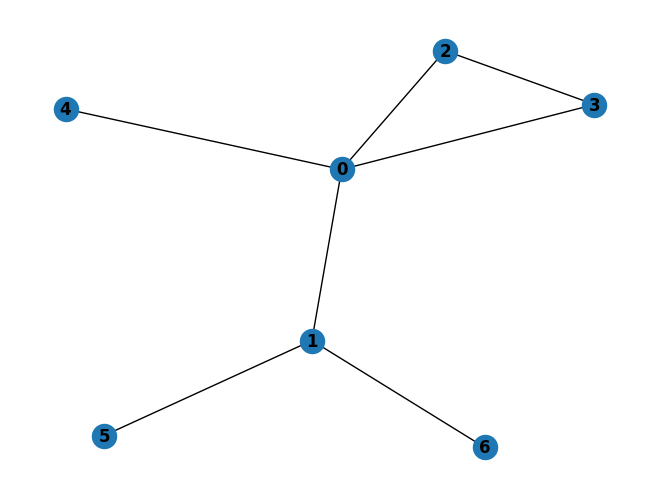

In [52]:
import networkx as nx
import matplotlib.pyplot as plt 

G = nx.Graph()

rows = 7
columns = 7
adjacent = [
  [0,1,1,1,1,0,0],
  [1,0,0,0,0,1,1],
  [1,0,0,1,0,0,0],
  [1,0,1,0,0,0,0],
  [1,0,0,0,0,0,0],
  [0,1,0,0,0,0,0],
  [0,1,0,0,0,0,0]]

for i in range(rows): 
  for j in range( columns): 
    if adjacent[i][j] == 1: 
        G.add_edge(i,j)

nx.draw(G, with_labels=True, font_weight='bold') 
plt.show() 

In [64]:
import numpy as np

D_tilde = np.zeros((rows, columns))
for i in range (rows):
  for j in range (columns):
    if i == j:
      D_tilde[i][j] = G.degree(i) + 1 

print(D_tilde)

[[5. 0. 0. 0. 0. 0. 0.]
 [0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]
